# 1. Exploración y limpieza

In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
original = pd.read_csv('../data/marketing_campaign.csv', sep='\t')
df = original.copy()
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [61]:
df.shape #Revisar longitud del dataframe

(2240, 29)

In [62]:
df.info() #Revisar que las variables estén correctas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [63]:
#eliminar la variable de fecha que puede no ser muy optima para el modelo
df = df.drop('Dt_Customer', axis=1)
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0


In [64]:
#Descripcion general de todos las variables numericas 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [65]:
#Revisar valores duplicados
df.duplicated().sum()

np.int64(0)

In [66]:
#Revisar valores nulos 
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [67]:
#Manejo del valor nulo (Remplazamos por el promedio de la variable)
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [68]:
#Revisar outliers , ya que en estos casos los outliers son muy peligrosos
numerics_vars = df.select_dtypes(exclude='object').columns.to_list()
#Excluir ID 
numerics_vars = numerics_vars[1:]
df[numerics_vars].dtypes

Year_Birth               int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [69]:
def outliers_detect(df):
    results = []

    #Revisar outliers , ya que en estos casos los outliers son muy peligrosos
    numerics_vars = df.select_dtypes(include=[np.number]).columns
    #Excluir ID 
    numerics_vars = numerics_vars[1:]
    
    for col in numerics_vars:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        #Limites
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        results.append({
            'Column': col,
            'Outliers_count': len(outlier),
            'Outliers_precentage %': round((len(outlier) / len(df))* 100, 2)
        })

    results = pd.DataFrame(results)
    results = results.sort_values(by='Outliers_count', ascending=False).reset_index(drop=True)

    return results

In [70]:
#Total outliers dentro del dataframe 
outlier_summary = outliers_detect(df)

print(f'                     🪐OUTLIERS SUMMARY🪐 \n\n {outlier_summary}')

                     🪐OUTLIERS SUMMARY🪐 

                  Column  Outliers_count  Outliers_precentage %
0              Response             334                  14.91
1      MntSweetProducts             248                  11.07
2             MntFruits             227                  10.13
3       MntFishProducts             223                   9.96
4          MntGoldProds             207                   9.24
5       MntMeatProducts             175                   7.81
6          AcceptedCmp4             167                   7.46
7          AcceptedCmp5             163                   7.28
8          AcceptedCmp3             163                   7.28
9          AcceptedCmp1             144                   6.43
10    NumDealsPurchases              86                   3.84
11             MntWines              35                   1.56
12         AcceptedCmp2              30                   1.34
13  NumCatalogPurchases              23                   1.03
14          

In [71]:
#Imputamos outliers usando funcion logaritmica solo las variables de gastos, ya que otras son contadores o ya son binarias 

outliers_cols= [
    'Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'
]

df[outliers_cols] = df[outliers_cols].apply(lambda x: np.log1p(x))
outlier_summary = outliers_detect(df)

# 2. Analisis

In [73]:
#Columnas para poder analisar (Basandome en aquellas que no sean binarias o estén en los mismos rangos)
cols =[
    'Year_Birth','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'
]
np.shape(cols)

(14,)

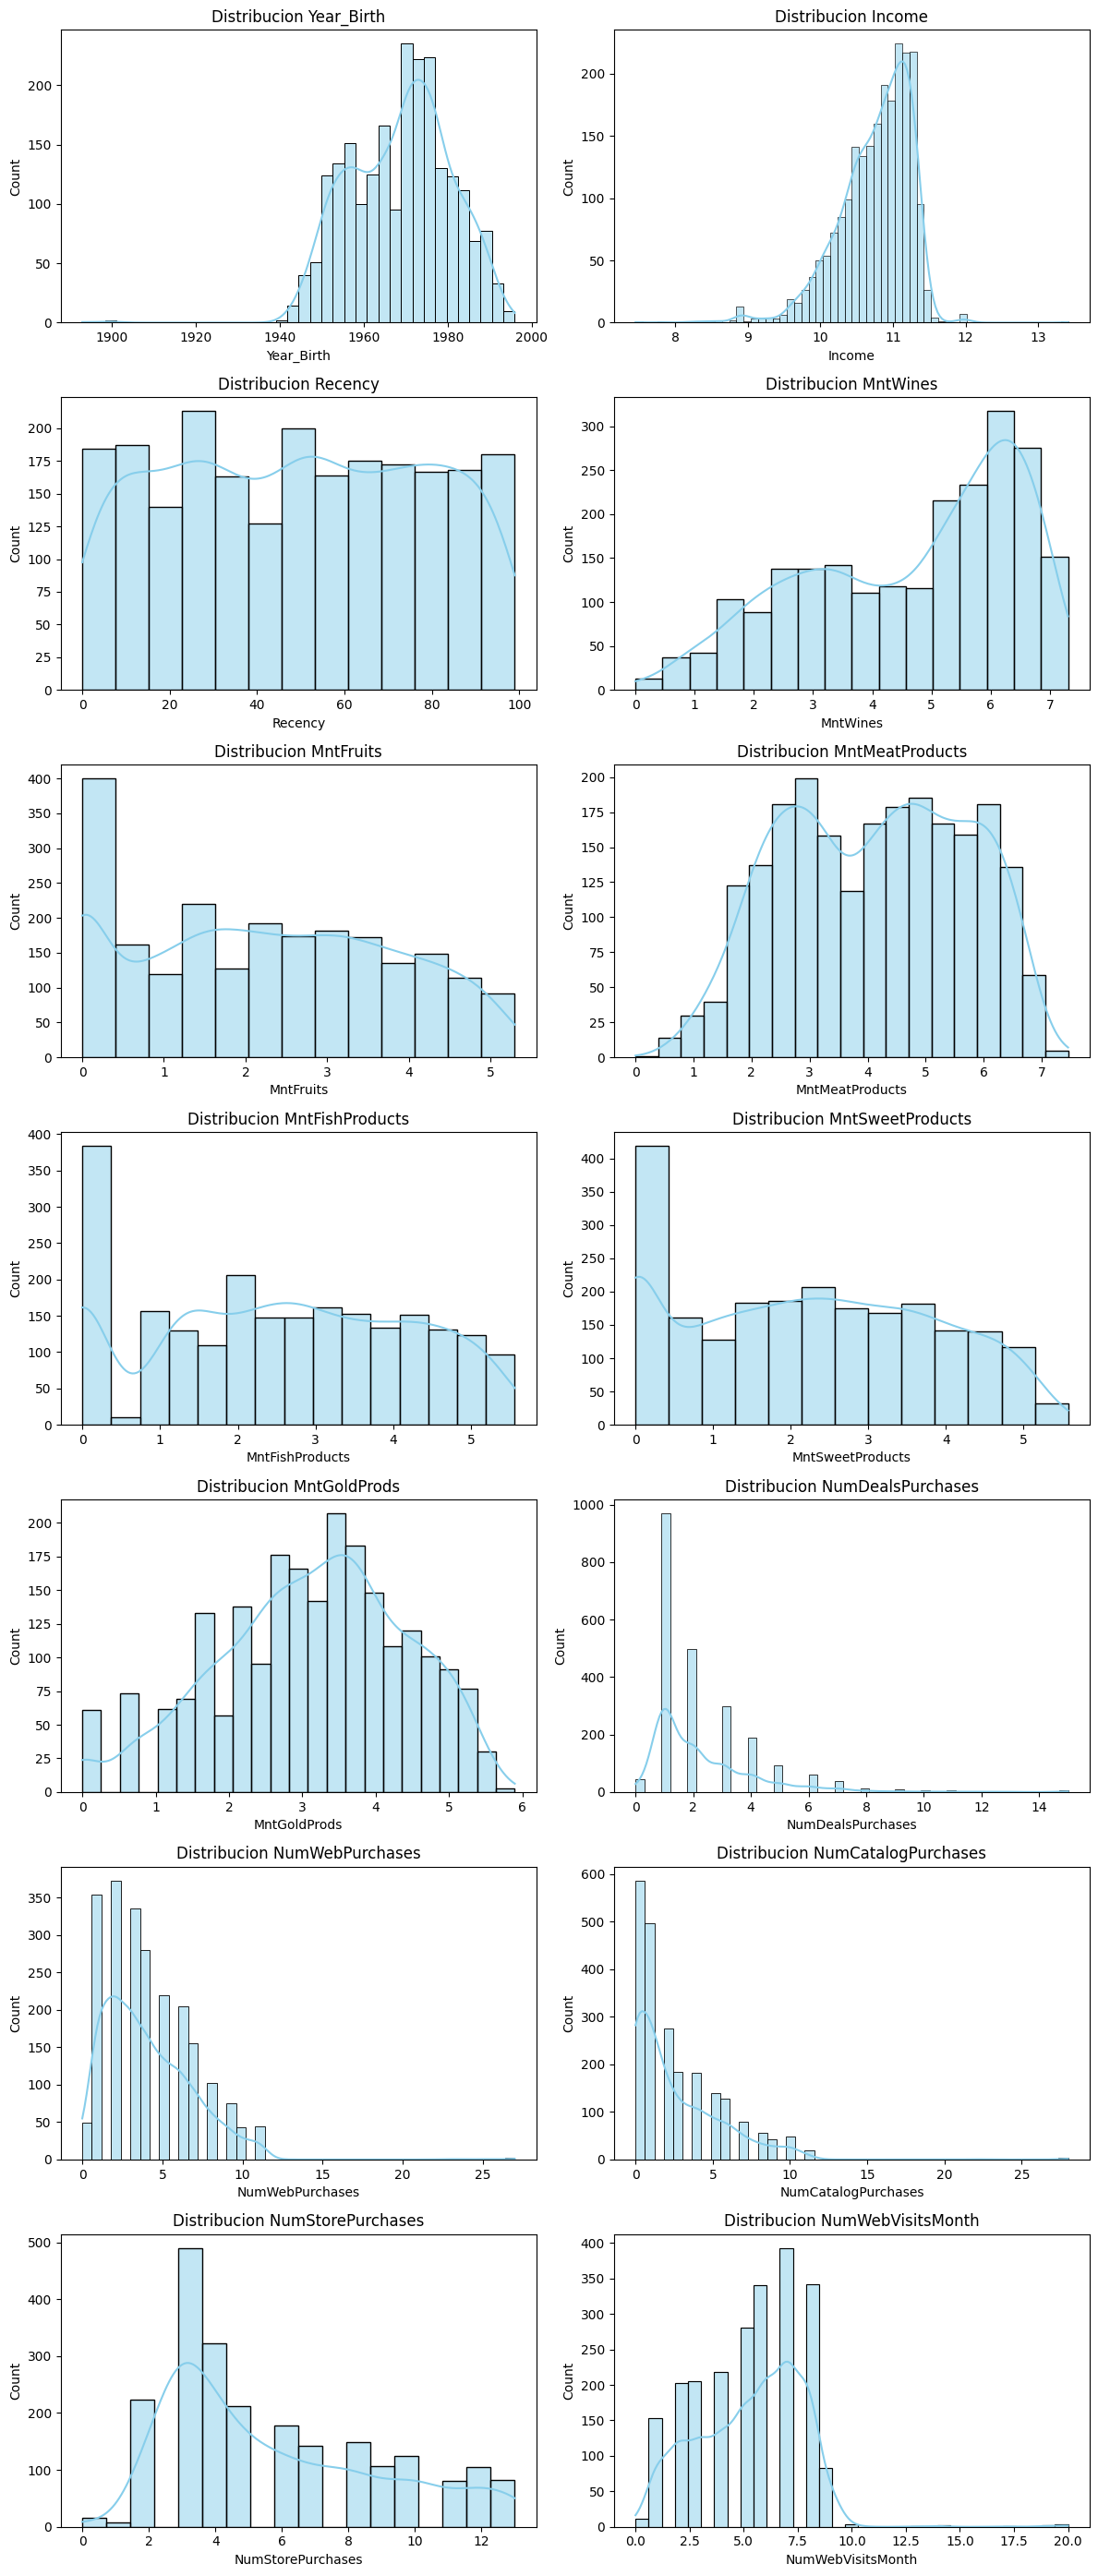

In [74]:
fig, axes = plt.subplots(7, 2, figsize=(12, 7* 4))
axes = axes.flatten()

for i, c in enumerate(cols):
    sns.histplot(df[c], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribucion {c}')

plt.tight_layout()
plt.show()

# 2.1 Lectura rápida de las distribuciones

A partir de los histogramas anteriores:

- Ingresos (`Income`): aplicamos `log1p`, por lo que la distribución ahora se aproxima a simétrica, con menor cola derecha. Antes era fuertemente asimétrica; el log reduce la influencia de valores muy altos.
- Gastos (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`): también transformados con `log1p`. Se observan picos cerca de cero (muchos clientes con poco gasto) y colas moderadas; tras el log se suaviza la asimetría.
- Recency: suele ser aproximadamente uniforme/ligeramente sesgada según campañas. Valores bajos indican clientes recientes; altos, clientes inactivos. Ver correlación con compras recientes.
- `Year_Birth`: concentración entre cohortes adultas; revisar outliers (años extremos) y considerar transformar a edad (`Age = ref_year - Year_Birth`).
- Frecuencias de compra (`NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`): variables de conteo, con masas en valores bajos y colas largas. 
- `NumWebVisitsMonth`: visitas en el último mes, discreta con moda baja; útil para segmentar comportamiento digital vs. tienda física.

- Estandarizar todas las variables para clustering (p.ej. `StandardScaler` o `RobustScaler`).


In [ ]:
df.to_csv('../data/clean_df.csv', index=False)